In [31]:
import  numpy as np
import math
from PIL import Image
import matplotlib.pyplot as plt

In [23]:
im = np.array(Image.open('0.jpg'))

In [24]:
im.shape

(256, 256, 3)

In [86]:
SensingRate = 0.25
Phi = np.random.randn(int(256*SensingRate),256)

mat_dct_1d = np.zeros((256,256))
v = range(256)
for k in range(0,256):  
    dct_1d = np.cos(np.dot(v,k*math.pi/256))
    if k > 0:
        dct_1d = dct_1d - np.mean(dct_1d)
    mat_dct_1d[:,k] = dct_1d/np.linalg.norm(dct_1d)
    
img_cs_1d = np.random.rand(int(256*SensingRate),256,3)
for i in range(3):
    img_cs_1d[:,:,i] = np.dot(Phi,im[:,:,i])

In [66]:
img_cs_1d.shape

(128, 256, 3)

In [74]:
def cs_sp(y,D):     
    K=math.floor(y.shape[0]/3)  
    pos_last=np.array([],dtype=np.int64)
    result=np.zeros((256))

    product=np.fabs(np.dot(D.T,y))
    pos_temp=product.argsort() 
    pos_temp=pos_temp[::-1]#反向，得到前面L个大的位置
    pos_current=pos_temp[0:K]#初始化索引集 对应初始化步骤1
    residual_current=y-np.dot(D[:,pos_current],np.dot(np.linalg.pinv(D[:,pos_current]),y))#初始化残差 对应初始化步骤2

    while True:  #迭代次数
        product=np.fabs(np.dot(D.T,residual_current))       
        pos_temp=np.argsort(product)
        pos_temp=pos_temp[::-1]#反向，得到前面L个大的位置
        pos=np.union1d(pos_current,pos_temp[0:K])#对应步骤1     
        pos_temp=np.argsort(np.fabs(np.dot(np.linalg.pinv(D[:,pos]),y)))#对应步骤2  
        pos_temp=pos_temp[::-1]
        pos_last=pos_temp[0:K]#对应步骤3    
        residual_last=y-np.dot(D[:,pos_last],np.dot(np.linalg.pinv(D[:,pos_last]),y))#更新残差 #对应步骤4
        if np.linalg.norm(residual_last)>=np.linalg.norm(residual_current): #对应步骤5  
            pos_last=pos_current
            break
        residual_current=residual_last
        pos_current=pos_last
    result[pos_last[0:K]]=np.dot(np.linalg.pinv(D[:,pos_last[0:K]]),y) #对应输出步骤  
    return  result

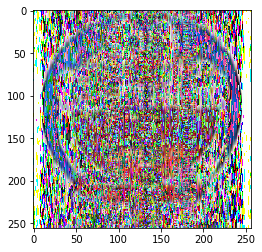

In [87]:
sparse_rec_1d = np.zeros((256,256,3))   # 初始化稀疏系数矩阵    
Theta_1d = np.dot(Phi,mat_dct_1d)   #测量矩阵乘上基矩阵
for i in range(256):
    for j in range(3):
        column_rec = cs_sp(img_cs_1d[:,i,j],Theta_1d)  #利用SP算法计算稀疏系数
        sparse_rec_1d[:,i,j] = column_rec;    

img_rec = np.random.randn(256,256,3)
for i in range(3):
    img_rec[:,:,i] = np.dot(mat_dct_1d,sparse_rec_1d[:,:,i])          #稀疏系数乘上基矩阵

a = np.array(img_rec,dtype='uint8') 
plt.imshow(a)
#显示重建后的图片
# image2 = Image.fromarray(img_rec)
# image2.show()
